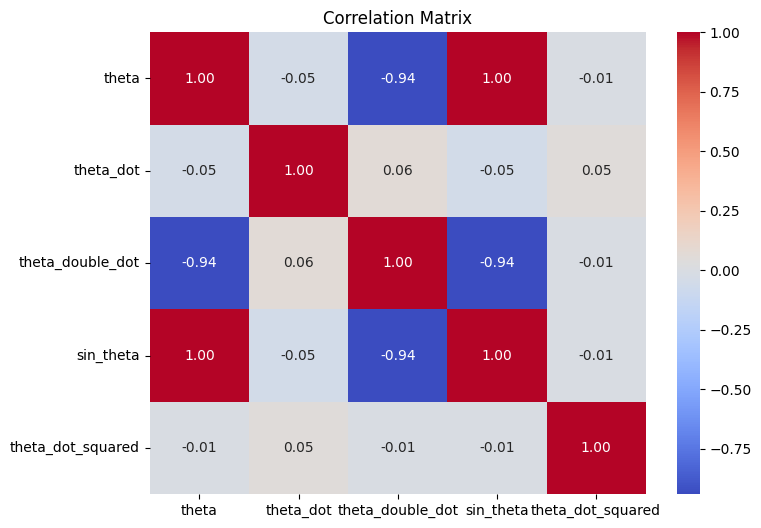

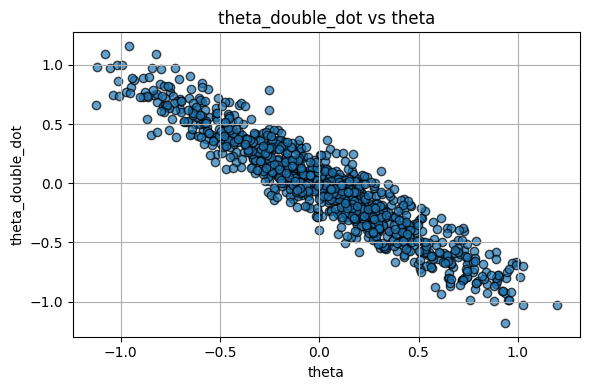

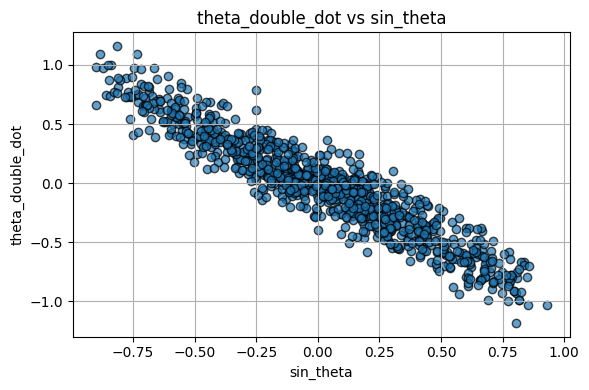

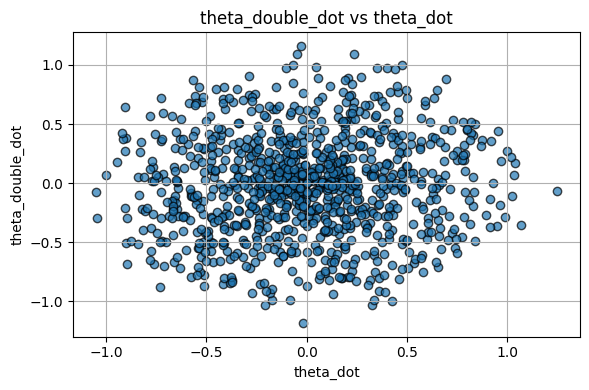

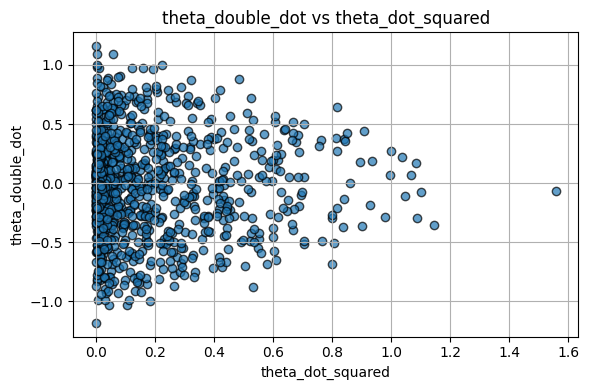

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("C:/Users/Ankit kumar/Downloads/hw5_0f0d0ff0-7939-409c-9824-42fb32282f32 (1).csv")

# Feature Engineering
df['sin_theta'] = np.sin(df['theta'])
df['theta_dot_squared'] = df['theta_dot'] ** 2

# Select relevant columns
features = ['theta', 'theta_dot', 'theta_double_dot', 'sin_theta', 'theta_dot_squared']
corr_matrix = df[features].corr()

# --- Part 1: Correlation Matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# --- Part 2: Scatter Plots vs theta_double_dot ---
target = 'theta_double_dot'
for col in ['theta', 'sin_theta', 'theta_dot', 'theta_dot_squared']:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[col], df[target], alpha=0.7, edgecolors='k')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"{target} vs {col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("C:/Users/Ankit kumar/Downloads/hw5_0f0d0ff0-7939-409c-9824-42fb32282f32 (1).csv")

# Feature Engineering
df['sin_theta'] = np.sin(df['theta'])
df['theta_dot_squared'] = df['theta_dot'] ** 2

# Define hypotheses
hypotheses = {
    "H1: theta": ['theta'],
    "H2: sin(theta)": ['sin_theta'],
    "H3: theta + theta_dot": ['theta', 'theta_dot'],
    "H4: theta + sin(theta) + theta_dot": ['theta', 'sin_theta', 'theta_dot'],
    "H5: full model": ['theta', 'sin_theta', 'theta_dot', 'theta_dot_squared']
}

# Output target
y = df['theta_double_dot']
alphas = np.logspace(-1, 1, 50)
results = {}

# Train/test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Cross-validation + test evaluation for each hypothesis
for name, features in hypotheses.items():
    X_train = train_df[features]
    y_train = train_df['theta_double_dot']
    X_test = test_df[features]
    y_test = test_df['theta_double_dot']

    # RidgeCV on training data only
    ridge = RidgeCV(alphas=alphas, cv=5)
    ridge.fit(X_train, y_train)

    # Predict on test data
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Store results
    results[name] = {
        "MSE": mse,
        "alpha": ridge.alpha_,
        "intercept": ridge.intercept_,
        "coefficients": dict(zip(features, ridge.coef_))
    }

# Print results
for name, res in results.items():
    print(f"\n{name}")
    print(f"{'-'*len(name)}")
    print(f"Best alpha (regularization strength): {res['alpha']:.10f}")
    print(f"Intercept: {res['intercept']:.10f}")
    print("Coefficients:")
    for feat, coef in res['coefficients'].items():
        print(f"  {feat:<20}: {coef:.4f}")
    print(f"Test Mean Squared Error (MSE): {res['MSE']:.10f}")



H1: theta
---------
Best alpha (regularization strength): 0.6551285569
Intercept: -0.0014526058
Coefficients:
  theta               : -0.9104
Test Mean Squared Error (MSE): 0.0207233509

H2: sin(theta)
--------------
Best alpha (regularization strength): 0.7196856730
Intercept: -0.0009669849
Coefficients:
  sin_theta           : -0.9890
Test Mean Squared Error (MSE): 0.0211123789

H3: theta + theta_dot
---------------------
Best alpha (regularization strength): 0.7196856730
Intercept: -0.0012805019
Coefficients:
  theta               : -0.9092
  theta_dot           : 0.0206
Test Mean Squared Error (MSE): 0.0206993000

H4: theta + sin(theta) + theta_dot
----------------------------------
Best alpha (regularization strength): 1.8420699693
Intercept: -0.0010640132
Coefficients:
  theta               : -0.4917
  sin_theta           : -0.4528
  theta_dot           : 0.0207
Test Mean Squared Error (MSE): 0.0207959280

H5: full model
--------------
Best alpha (regularization strength): 1.842

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Load data
df = pd.read_csv("C:/Users/Ankit kumar/Downloads/hw5_0f0d0ff0-7939-409c-9824-42fb32282f32 (1).csv")

# Feature Engineering
df['sin_theta'] = np.sin(df['theta'])
df['theta_dot_squared'] = df['theta_dot'] ** 2

# Define hypotheses
hypotheses = {
    "H1: theta": ['theta'],
    "H2: sin(theta)": ['sin_theta'],
    "H3: theta + theta_dot": ['theta', 'theta_dot'],
    "H4: theta + sin(theta) + theta_dot": ['theta', 'sin_theta', 'theta_dot'],
    "H5: full model": ['theta', 'sin_theta', 'theta_dot', 'theta_dot_squared']
}

y = df['theta_double_dot']
alphas = np.logspace(-1, 1, 50)
cv_results = {}
test_results = {}

# Train/test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Cross-validation on training data for each hypothesis
for name, features in hypotheses.items():
    X_train = train_df[features]
    y_train = train_df['theta_double_dot']
    
    ridge = RidgeCV(alphas=alphas, cv=5)
    scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    avg_cv_mse = -np.mean(scores)
    cv_results[name] = avg_cv_mse

# Select best hypothesis based on CV MSE
best_hypothesis = min(cv_results, key=cv_results.get)
print(f"\nBest Hypothesis based on Cross-Validation: {best_hypothesis}")
print(f"CV MSE: {cv_results[best_hypothesis]:.10f}")

# Retrain best model on training set and evaluate on test set
features = hypotheses[best_hypothesis]
X_train = train_df[features]
y_train = train_df['theta_double_dot']
X_test = test_df[features]
y_test = test_df['theta_double_dot']

ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

# Final Model Results
print("\nFinal Model Evaluation:")
print(f"Best alpha (regularization strength): {ridge.alpha_:.10f}")
print(f"Intercept: {ridge.intercept_:.10f}")
print("Coefficients:")
for feat, coef in zip(features, ridge.coef_):
    print(f"  {feat:<20}: {coef:.4f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.10f}")



Best Hypothesis based on Cross-Validation: H5: full model
CV MSE: 0.0198433888

Final Model Evaluation:
Best alpha (regularization strength): 1.1513953993
Intercept: 0.0026780108
Coefficients:
  theta               : -0.4877
  sin_theta           : -0.4605
  theta_dot           : 0.0304
  theta_dot_squared   : -0.0373
Test Mean Squared Error (MSE): 0.0205678609
